## Create Network of DAOs


In [1]:
import networkx as nx

import itertools

import matplotlib.pyplot as plt


Load utility functions.

In [2]:
from adsl import pd_read_dir, pd_read_json

In [ ]:
from adsl import pd_read_dir, pd_read_json

Load votes of all proposals in all daos.

In [4]:
votes = pd_read_dir('../../4_power/data/votes/')

In [5]:
# votes.head()

## Cleanup
votes['proposal'] = votes['proposal'].apply(lambda x :
                                            None if x is None else x['id'])

votes['space'] = votes['space'].apply(lambda x :
                                            None if x is None else x['id'])

votes['vp'] = votes['vp'].astype(float)

Group by voter.

In [6]:
groups = votes.groupby(['voter'])

In [7]:
groups.ngroups

## Note len(groups) is much slower...

1189249

Let's have a look at a group in a bit more detail.

In [12]:
IDX = 10

group_id = list(groups.groups)[IDX]

groups.get_group(group_id)

,id,ipfs,voter,created,space,proposal,choice,metadata,reason,app,vp,vp_by_strategy,vp_state
124191,0xb8d886317a89e15e9af194de7a281f707fc9cda75f1a...,QmYWA8BLJb7UgjHUoZauQ2DZu2wLm2x9t8rS5gXTR5FkEU,0x00000000007CdeEDD7f45C80CE479Fff1C4e3791,1653740036,futuristsocialclub.eth,0x157baa7057750fb1a1dc8822a09af14dee7dc6804dc1...,2,{},,,1.000000,[1],final
181995,0x335714d206ddfef3c5381d5f6a11af048e0dece09b80...,QmRH8jAyd4o4tMkCNFbf53EpEGtqK6gVaQjtrUMiPSfzd4,0x00000000007CdeEDD7f45C80CE479Fff1C4e3791,1654053026,futuristsocialclub.eth,0x0f6b8cbd8b4c43e585c82f3263810e874e01ce5baa62...,1,{},,,1.000000,[1],final
191784,0x87515421dd2f7746a07f400bfbe774963fac88978b93...,QmRoqmDT81ubuaVEK6n5ehmTRvCBVxD7MwEDJxAxekH5mm,0x00000000007CdeEDD7f45C80CE479Fff1C4e3791,1654142767,ghoststreasury.eth,0x0da3a3890e23d2607afe2cf666e738d2da8e4da75dec...,1,{},,,2.000000,[2],final
196246,0x2751a0f610665118b7fc2a03e933b1e199ee573291c3...,QmNv12Y9oACX8XBQrNDFw5vGHvFMWSc5ReAhKz2qEdFPh7,0x00000000007CdeEDD7f45C80CE479Fff1C4e3791,1655737414,futuristsocialclub.eth,0x17b7b4a0dbd8b13081165b6f9d307c2a9f92617cabc7...,4,{},,,1.000000,[1],final
160847,bafkreiatayh5szz3bffwtmxafsikcb2whbmmk2w4svrlf...,bafkreiatayh5szz3bffwtmxafsikcb2whbmmk2w4svrlf...,0x00000000007CdeEDD7f45C80CE479Fff1C4e3791,1657796060,ghoststreasury.eth,0x88abd2e6ca5fd2735537ae82055cd873e42991374b8d...,1,{},,,2.000000,"[2, 0]",final
18903,bafkreiaw6smpef73kz3klftbgavp6vfyao3dpz7l74ryn...,bafkreiaw6smpef73kz3klftbgavp6vfyao3dpz7l74ryn...,0x00000000007CdeEDD7f45C80CE479Fff1C4e3791,1658483964,ghoststreasury.eth,0xfa485c6e045b447e6b501c6d7b41098df03b8d33d415...,2,{},,,2.000000,"[2, 0]",final
28461,bafkreiagwntw6cyohft5xxjim223mqs3z6x2hrwmgfcqi...,bafkreiagwntw6cyohft5xxjim223mqs3z6x2hrwmgfcqi...,0x00000000007CdeEDD7f45C80CE479Fff1C4e3791,1659266916,dydxgov.eth,0x28193f3cc8f0a1d1a98a7c32ea4cd51b497c27b8de6b...,2,{},,,214.768265,[214.7682647159],final
153146,0x7c90bd7a9632103fb8cd42e1861d425b24cf50fbb8c2...,bafkreifz64ft6etn6vwgf4chky4ubsamc4kqwxh2efqh4...,0x00000000007CdeEDD7f45C80CE479Fff1C4e3791,1660291899,ghoststreasury.eth,0xda232d56126683d9b04d4ad5653b858d09da30713fe3...,2,{},,snapshot,2.000000,"[2, 0]",final
166421,0x831366b4888f660f2f1df16f217134a6146118fe10e3...,bafkreif3bcgtgdweftuopj5rmuwgcrnnw3sp6cnjwi3x7...,0x00000000007CdeEDD7f45C80CE479Fff1C4e3791,1660392796,futuristsocialclub.eth,0x80f6bf357598609729c5b8c2fa9e5deca5446cd8bf42...,1,{},,snapshot,1.000000,[1],final
160084,0xf48668d6a2d891eb7b8f0664347798b184ebfd4e32f1...,bafkreibldpi2sqwk5ccwrbpj63grjfn2lhxgy4pp3ldx5...,0x00000000007CdeEDD7f45C80CE479Fff1C4e3791,1661931765,ghoststreasury.eth,0xfc60ff7d5c857430c05938d235fdd34971300ac47d1a...,2,{},,snapshot,2.000000,"[2, 0]",final


The group contains all the votes by a user. We are interested in the number of unique spaces the user voted in.

**Exercise** Create a dataframe of unique voter spaces combinations.

In [21]:
vote_space = votes[['voter', 'space']]


In [22]:
print(len(vote_space))
vote_space = vote_space.drop_duplicates()
print(len(vote_space))

5494790
1849847


In [25]:
vote_space.sort_values("voter").head(100)

,voter,space
765640,0x0000000000002Cb29260612E744Ec57d9D1Fc5C6,cakevote.eth
981081,0x0000000000002Cb29260612E744Ec57d9D1Fc5C6,sushigov.eth
176560,0x000000000004d7463D0f9C77383600bC82D612f5,nftfinance.eth
7168,0x000000000004d7463D0f9C77383600bC82D612f5,doodles.eth
156602,0x000000000005E4314EA8EFD6f9ec0e8D65444384,foundersdao.eth
...,...,...
2279813,0x0000000813B34008A225De08a6a61835508C71f9,arbitrum-odyssey.eth
196644,0x0000000813B34008A225De08a6a61835508C71f9,opcollective.eth
73658,0x00000008a56679189feBE250ea8e651Aa3eae054,stgdao.eth
1422822,0x0000000901C92bb92C98DF004bE56D37D1604C93,dea.eth


In [26]:
groups2 = vote_space.groupby(['voter'])

In [67]:
## If you system has low memory, it's a good idea to remove unused
## variables before a computational intensive loop.

## votes = None

#### Let's create a weighted undirected graph. 

- Nodes are daos an links are users voting in both daos. 
- The weight of the link is the number of common users.

Notes: There are different strategies.

In [28]:
G = nx.Graph()

def add_edges(v):
    for x in itertools.combinations(v, 2):
        edge_data = G.get_edge_data(x[0], x[1])
        if edge_data is None:
            G.add_edge(x[0], x[1], weight=1)
        else:
            edge_data['weight'] += 1

    

df = groups2['space'].apply(add_edges)

### Some statitics.

In [29]:
G.number_of_edges(), G.number_of_nodes()

(275865, 5561)

In [30]:
nx.get_edge_attributes(G, "weight")

{('cakevote.eth', 'sushigov.eth'): 207,
 ('cakevote.eth', 'pancake'): 1481,
 ('cakevote.eth', 'rss3.eth'): 232,
 ('cakevote.eth', 'opcollective.eth'): 1672,
 ('cakevote.eth', 'dpet.eth'): 20,
 ('cakevote.eth', 'undw3.eth'): 39,
 ('cakevote.eth', 'balancer.eth'): 1631,
 ('cakevote.eth', 'arbitrum-odyssey.eth'): 5021,
 ('cakevote.eth', 'ctcswap.eth'): 7871,
 ('cakevote.eth', 'sdaowin.eth'): 1,
 ('cakevote.eth', 'autometafi.eth'): 2178,
 ('cakevote.eth', 'ethip.eth'): 3507,
 ('cakevote.eth', 'optimismio.eth'): 217,
 ('cakevote.eth', 'revotu.eth'): 324,
 ('cakevote.eth', 'cow.eth'): 985,
 ('cakevote.eth', 'shellprotocol.eth'): 2049,
 ('cakevote.eth', 'syncswapxyz.eth'): 3070,
 ('cakevote.eth', 'aave.eth'): 3214,
 ('cakevote.eth', 'bwkj88.eth'): 397,
 ('cakevote.eth', 'dunjia.eth'): 332,
 ('cakevote.eth', 'poh.eth'): 34,
 ('cakevote.eth', 'pstakefinance.eth'): 32,
 ('cakevote.eth', 'assangedao.eth'): 82,
 ('cakevote.eth', 'dappradar.eth'): 194,
 ('cakevote.eth', 'gal.eth'): 689,
 ('cakevote

In [31]:
sorted_edges = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1), reverse=True)


In [32]:
sorted_edges

[('arbitrum-odyssey.eth', 'shellprotocol.eth', {'weight': 11271}),
 ('kfive.eth', '0x11e.eth', {'weight': 10355}),
 ('19451024.eth', 'qianyue.eth', {'weight': 9889}),
 ('ethip.eth', 'kopio.eth', {'weight': 9051}),
 ('ethip.eth', 'younghwang.eth', {'weight': 8615}),
 ('kopio.eth', 'younghwang.eth', {'weight': 8614}),
 ('syncswapxyz.eth', 'cultivatordao.eth', {'weight': 8096}),
 ('nftfinance.eth', 'aave.eth', {'weight': 8044}),
 ('cakevote.eth', 'ctcswap.eth', {'weight': 7871}),
 ('syncswapxyz.eth', 'zksyncdao.eth', {'weight': 7712}),
 ('syncswapxyz.eth', 'arbitrum-odyssey.eth', {'weight': 6293}),
 ('aave.eth', 'lendhub.eth', {'weight': 6110}),
 ('aave.eth', 'balsam.eth', {'weight': 6075}),
 ('syncswapxyz.eth', 'opcollective.eth', {'weight': 6072}),
 ('balsam.eth', 'tarpon.eth', {'weight': 6070}),
 ('aave.eth', 'tarpon.eth', {'weight': 6069}),
 ('balsam.eth', 'hotstock.eth', {'weight': 6069}),
 ('aave.eth', 'hotstock.eth', {'weight': 6068}),
 ('balsam.eth', 'hinny.eth', {'weight': 6068})

In [67]:
weights =  [link[2]['weight'] for link in sorted_edges]


In [68]:
len(weights)

275865

Let's look at the distribution of weights.

(array([2.4413e+05, 2.0335e+04, 9.6850e+03, 1.0450e+03, 1.2700e+02,
        6.0000e+01, 4.5000e+01, 3.1000e+01, 3.6000e+01, 1.4000e+01,
        1.3000e+01, 1.3000e+01, 1.1000e+01, 1.4000e+01, 1.2000e+01,
        8.0000e+00, 5.0000e+00, 6.0000e+00, 2.8000e+01, 6.0000e+00,
        4.0000e+00, 6.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 4.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 7.7000e+01, 1.1200e+02, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.00

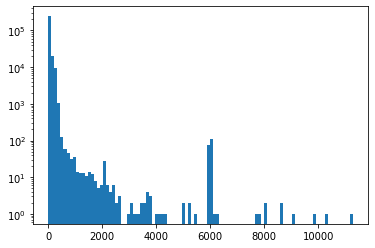

In [79]:
plt.hist(weights, bins=100, log=True)

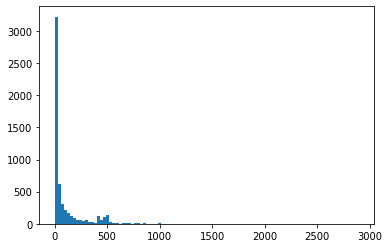

In [33]:

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins=100)
    # plt.show()

plot_degree_dist(G)

Text(0, 0.5, 'Frequency')

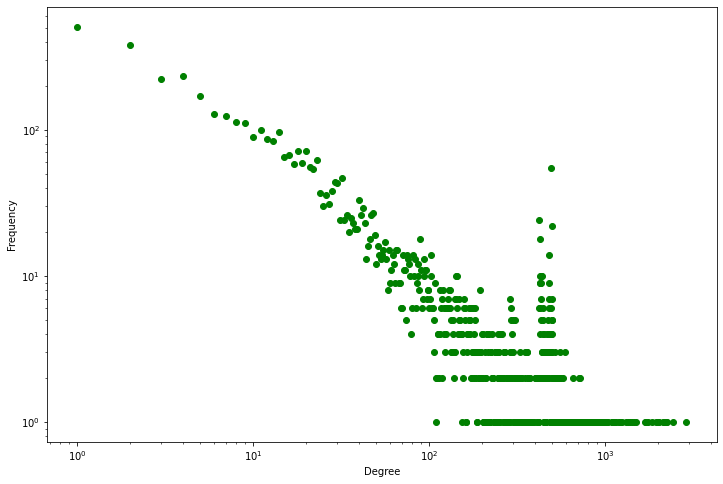

In [34]:
m=1
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'go') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

Let's compute some statistics.

In [105]:
nx.density(G)

0.01784427520023183

In [36]:
## Clustering for every node.
## nx.clustering(G)

nx.average_clustering(G)

0.6792077219589466

In [37]:
nx.diameter(G)

NetworkXError: Found infinite path length because the graph is not connected

In [ ]:
## Get the giant component.
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
giant_component = G.subgraph(Gcc[0])

In [44]:
print(len(Gcc))
giant_component.number_of_nodes() / G.number_of_nodes()

33


0.9845351555475634

In [ ]:
## May take a long time.
nx.diameter(giant_component)

In [38]:
## May take a long time.
nx.average_shortest_path_length(giant_component)

NetworkXError: Graph is not connected.

In [81]:
nx.write_gexf(G, "data/daos_network.gexf")

### Pruning.

**Exercise** Let's remove the edges with lower weights 

_Hint_: pick a suitable value looking at the distribution of weights above.

In [95]:
G2 = G.copy()
print(G2.number_of_edges())

T = 1000
for edge in G2.edges:
    # print(edge)
    edge_data = G2.get_edge_data(edge[0], edge[1])
    if edge_data['weight'] < T:
        G2.remove_edge(edge[0], edge[1])

G2.number_of_edges()
        

275865


600

Let's export the network to file to import into Gephi for visualization.

In [ ]:
nx.write_gexf(G2, "data/daos_network_pruned_edges_1k.gexf")

The graph is probably still too large...

In [97]:
nodes = max(nx.connected_components(G2), key=len)
H = nx.subgraph(G2, nodes)

In [98]:
H.number_of_edges(), H.number_of_nodes()

(583, 93)

In [99]:
nx.density(H)

0.13627863487611033

In [100]:
nx.average_clustering(H)

0.692647801725861

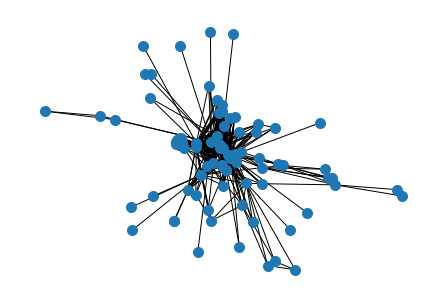

In [101]:
nx.draw_spring(H, node_size=100)

In [102]:
nx.write_gexf(H, "data/daos_network_edges_1000_no_isolates.gexf")